<a href="https://colab.research.google.com/github/Oktavian19/ML_2025/blob/main/JS05/JS05_TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Iris Dataset

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

X_scaled = StandardScaler().fit_transform(X)


# Clustering HDBSCAN

In [20]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
cluster_labels = clusterer.fit_predict(X_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Jumlah cluster dan Noise yang terbentuk

In [21]:
import numpy as np

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = np.sum(cluster_labels == -1)

print(f"Clusters yang terbentuk: {n_clusters}")
print(f"Jumlah noise: {n_noise}")


Clusters yang terbentuk: 2
Jumlah noise: 2


# Visualisasi

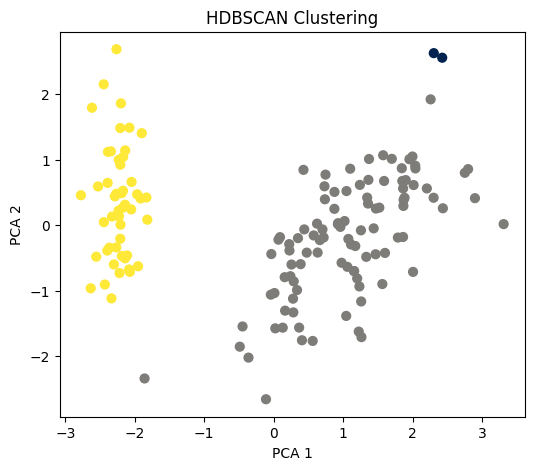

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='cividis', s=40)
plt.title('HDBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [23]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(data.target, cluster_labels)
print(f"Clustering HDBSCAN vs label asli: {ari:.3f}")


Clustering HDBSCAN vs label asli: 0.539


# Analisis Singkat

Pembentukan kluster menggunakan HDBSCAN dari titik X dan titik Y sebagai noise. Label dari kluster yang terbentuk menunjukkan tingkat kemiripan sedang (0.539) dengan label asli, menunjukkan bahwa HDBSCAN berhasil mengidentifikasi struktur utama namun masih menggabungkan atau memisahkan beberapa kelas